In [1]:
#bibliotecas de análise
import pandas as pd
import numpy as np

#pacotes para gráficos
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

#pacote para clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

#pacote para realização do PCA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

#pacote para arvore de decião
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#pacotes para o randon florest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

Carregando a tabela de dados préprocessada

In [2]:
df = pd.read_csv('../Scripts/df_metal_PCA.csv', sep = ',', header = 0) 
df2 = pd.read_csv('../Scripts/df_metal_ML.csv', sep = ',', header = 0)

In [3]:
df.head(5)

,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,HV,classe_nome
0,421,314,39.0,126.0,207000,79000,0.3,7860,0.0,0.0,7
1,424,324,37.0,121.0,207000,79000,0.3,7860,0.0,0.0,3
2,386,284,37.0,111.0,207000,79000,0.3,7860,0.0,0.0,4
3,448,331,36.0,143.0,207000,79000,0.3,7860,0.0,0.0,7
4,441,346,35.8,131.0,207000,79000,0.3,7860,550.0,0.0,3


In [4]:
df.classe_nome.unique()

array([ 7,  3,  4,  2, 10,  0, 12,  6,  1,  5,  8, 11,  9])

In [5]:
df.dropna(inplace=True)

In [6]:
df.describe(include = 'all')

,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,HV,classe_nome
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,572.753222,387.010309,16.759278,52.844716,164571.520619,85598.840206,0.302977,6929.843428,78.019974,34.922680,1.696521
std,326.834927,289.482497,13.303978,102.030879,56135.405867,125326.800138,0.024590,2115.171710,244.714895,120.854594,2.384949
min,69.000000,28.000000,0.000000,0.000000,73000.000000,26000.000000,0.200000,1750.000000,0.000000,0.000000,0.000000
25%,340.000000,205.000000,8.000000,0.000000,105000.000000,40000.000000,0.300000,7160.000000,0.000000,0.000000,0.000000
50%,500.000000,305.000000,14.000000,0.000000,206000.000000,79000.000000,0.300000,7860.000000,0.000000,0.000000,1.000000
75%,705.000000,470.000000,22.000000,62.000000,206000.000000,80000.000000,0.320000,7860.000000,0.000000,0.000000,3.000000
max,2220.000000,2048.000000,70.000000,627.000000,219000.000000,769000.000000,0.350000,8930.000000,1360.000000,800.000000,12.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Su           1552 non-null   int64  
 1   Sy           1552 non-null   int64  
 2   A5           1552 non-null   float64
 3   Bhn          1552 non-null   float64
 4   E            1552 non-null   int64  
 5   G            1552 non-null   int64  
 6   mu           1552 non-null   float64
 7   Ro           1552 non-null   int64  
 8   pH           1552 non-null   float64
 9   HV           1552 non-null   float64
 10  classe_nome  1552 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 133.5 KB


In [8]:
df.drop(['pH', 'HV'], axis = 1, inplace=True)

In [9]:
from sklearn.model_selection import train_test_split

Separando em dados de teste e treino 

In [10]:
#sempando as variaveis preditoras (X) das variáveis resposta (Y)
X = df.iloc[:, 0:8]
Y = df['classe_nome']

In [11]:
#padronização dos dados
scaler = StandardScaler()
scaler.fit(X)
scaler_x = scaler.transform(X)

In [15]:
x_treino, x_teste, y_treino, y_teste = train_test_split(scaler_x ,Y, random_state = 10, shuffle = False, train_size = .70)

In [51]:
df_treino = pd.DataFrame(data = x_treino, columns = X.columns)
df_treino.head(3)

,Su,Sy,A5,Bhn,E,G,mu,Ro
0,-0.464461,-0.252291,1.672273,0.717223,0.756067,-0.05267,-0.121096,0.439896
1,-0.455279,-0.217736,1.521894,0.668202,0.756067,-0.05267,-0.121096,0.439896
2,-0.571583,-0.355958,1.521894,0.570161,0.756067,-0.05267,-0.121096,0.439896


In [21]:
#calculando o melhor número de componentes do PCA
pca = PCA(n_components=7)

pca.fit_transform(df_x_treino)

array([[ 0.8605418 , -1.3113389 ,  0.22425375, ...,  1.05863675,
        -0.56304864, -0.24607242],
       [ 0.85960349, -1.21879764,  0.1563281 , ...,  0.98410783,
        -0.52501749, -0.28137965],
       [ 0.72576851, -1.33883515,  0.11906423, ...,  0.97611374,
        -0.52918617, -0.32945681],
       ...,
       [ 0.32634849, -1.20330102, -0.58790638, ...,  0.08117083,
        -0.40866806, -0.42199681],
       [ 0.37564887, -1.06631199, -0.63675935, ...,  0.02037844,
        -0.36701959, -0.44597262],
       [ 0.53650275, -0.83902655, -0.68694997, ..., -0.10219074,
        -0.33862516, -0.3893881 ]])

In [22]:
prop_var = pca.explained_variance_ratio_
autovalor = pca.explained_variance_

In [23]:
print(prop_var, autovalor)

[0.41791899 0.20808519 0.15200526 0.10455064 0.05356518 0.0319329
 0.02919156] [3.75962451 1.87194695 1.36744847 0.94054384 0.48187557 0.2872703
 0.26260904]


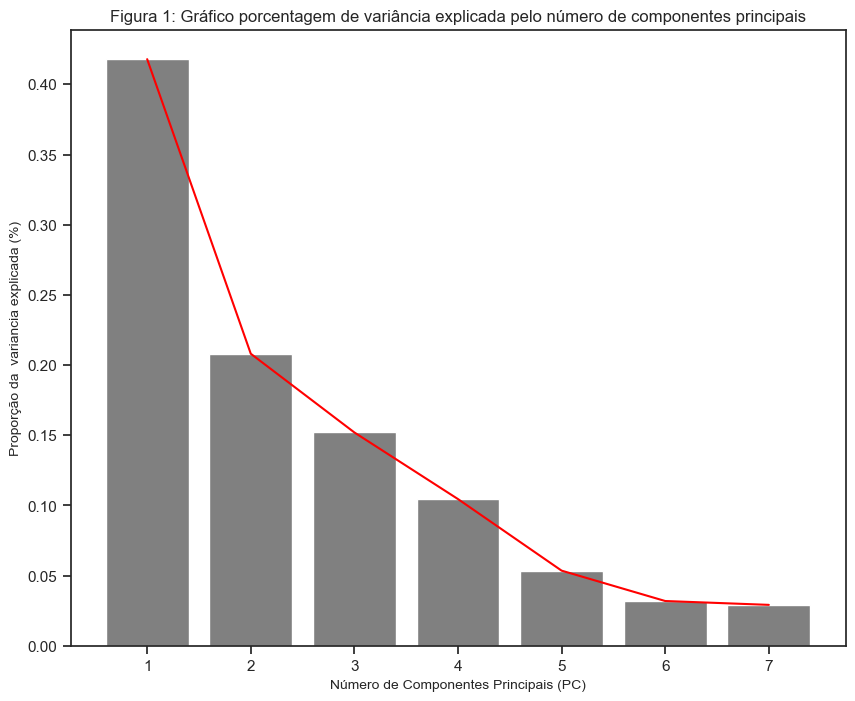

In [26]:
sns.set_theme(style = 'ticks')

PC = np.arange(pca.n_components_)+1
var = pca.explained_variance_ratio_

f, ax = plt.subplots(figsize=(10,8))

sns.barplot(x = PC, y = var, color = 'gray')
sns.lineplot(x = PC-1, y = var, color = 'red')

ax.set_xlabel('Número de Componentes Principais (PC)', fontsize = 10)
ax.set_ylabel('Proporção da  variancia explicada (%)', fontsize = 10)
ax.set_title('Figura 1: Gráfico porcentagem de variância explicada pelo número de componentes principais', fontsize = 12)

plt.show()

/private/tmp/PKInstallSandbox.QZdpJd/tmp/ipykernel_31367/3259076905.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = PC-1, y = autovalor, palette = 'viridis', markers=True, dashes=True)


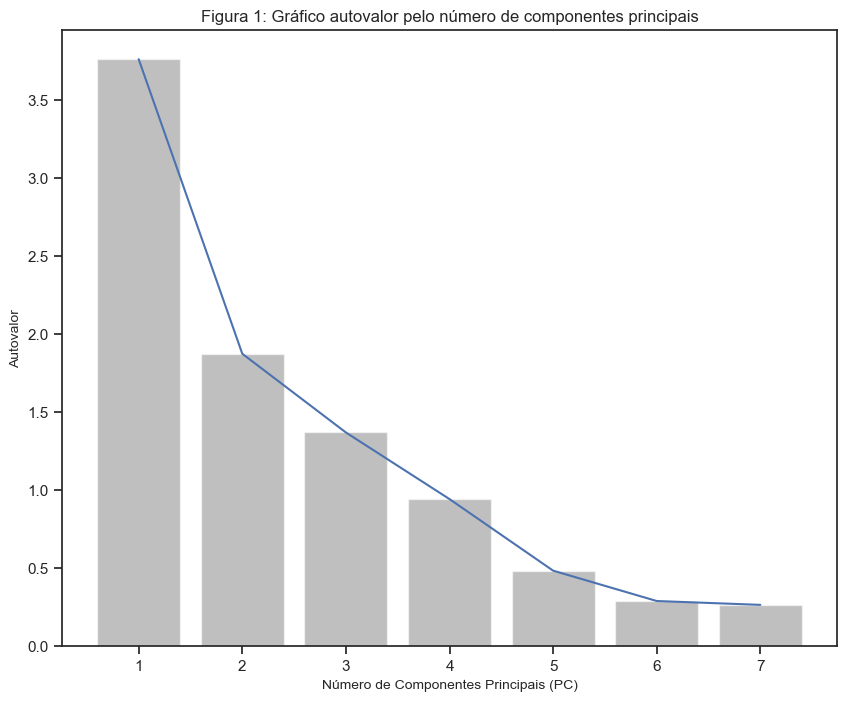

In [27]:
sns.set_theme(style = 'ticks')

PC = np.arange(pca.n_components_)+1
autovalor = pca.explained_variance_

f, ax = plt.subplots(figsize=(10,8))

sns.barplot(x = PC, y = autovalor, color = 'gray', alpha = 0.5)
sns.lineplot(x = PC-1, y = autovalor, palette = 'viridis', markers=True, dashes=True)

ax.set_xlabel('Número de Componentes Principais (PC)', fontsize = 10)
ax.set_ylabel('Autovalor', fontsize = 10)
ax.set_title('Figura 1: Gráfico autovalor pelo número de componentes principais', fontsize = 12)

plt.show()

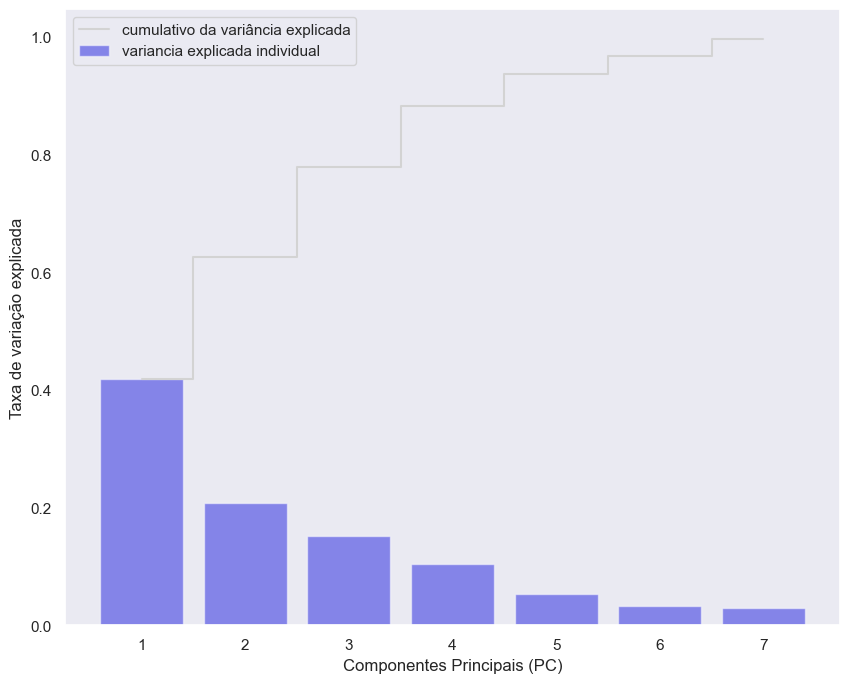

In [28]:
sns.set_theme(style='dark')

f, ax = plt.subplots(figsize = (10,8))

PC = np.arange(pca.n_components_)+1
var = pca.explained_variance_ratio_
cum_var = np.cumsum(var)

sns.barplot(x= PC, y = var, alpha=0.5, label='variancia explicada individual', color = 'blue')
plt.step(x = PC-1, y = cum_var, where='mid',label='cumulativo da variância explicada', color = 'lightgray')

plt.ylabel('Taxa de variação explicada')
plt.xlabel('Componentes Principais (PC)')
plt.legend(loc='best')
plt.show()

In [32]:
df_teste = pd.DataFrame(data = x_teste, columns = X.columns)
df_teste.head(3)

,Su,Sy,A5,Bhn,E,G,mu,Ro
0,-0.283884,-0.179724,0.243669,-0.518096,0.738248,-0.044688,-0.121096,0.439896
1,-0.773585,-0.660046,1.221135,0.766243,0.684788,-0.060652,-0.121096,0.445099
2,-0.742979,-0.628946,1.070756,0.883893,0.738248,-0.052670,-0.121096,0.438005


In [33]:
pca_otimo = PCA(n_components=3)
df_pca = pca_otimo.fit_transform(df_teste)

In [34]:
df_pca_metal = pd.DataFrame(data = df_pca, columns = ['PC1', 'PC2','PC3'])

display(df_pca_metal.head(10))

,PC1,PC2,PC3
0,-0.599065,-1.070752,0.096913
1,-1.711083,-0.696638,-1.119286
2,-1.648848,-0.553788,-1.155420
3,-0.724449,-0.771703,0.507522
4,-1.043246,0.506107,-0.755339
5,-1.665379,-0.421776,-0.983931
6,-1.566891,-0.133421,-0.851920
7,-0.734829,-0.521569,0.723620
8,-0.897119,0.861043,-0.606942
9,-1.559904,-0.023652,-0.715885


In [173]:
nome = {0:'desconhecido', 1:'fundido', 2:'temperado', 3:'normalizado', 4:'recozido', 5:'tratamento térmico', 6:'liga-aluminio', 7:'encruamento', 8:'endurecimento', 9:'melhorado', 10:'ligas', 11:'nitração', 12:'outros'}

In [36]:
df_pca_metal['classe'] = y_teste.values
df_pca_metal['tipo'] = df_pca_metal['classe'].map(nome)
df_pca_metal.head(10)

,PC1,PC2,PC3,classe,tipo
0,-0.599065,-1.070752,0.096913,0,desconhecido
1,-1.711083,-0.696638,-1.119286,3,normalizado
2,-1.648848,-0.553788,-1.155420,3,normalizado
3,-0.724449,-0.771703,0.507522,8,endurecimento
4,-1.043246,0.506107,-0.755339,7,encruamento
5,-1.665379,-0.421776,-0.983931,4,recozido
6,-1.566891,-0.133421,-0.851920,3,normalizado
7,-0.734829,-0.521569,0.723620,8,endurecimento
8,-0.897119,0.861043,-0.606942,7,encruamento
9,-1.559904,-0.023652,-0.715885,4,recozido


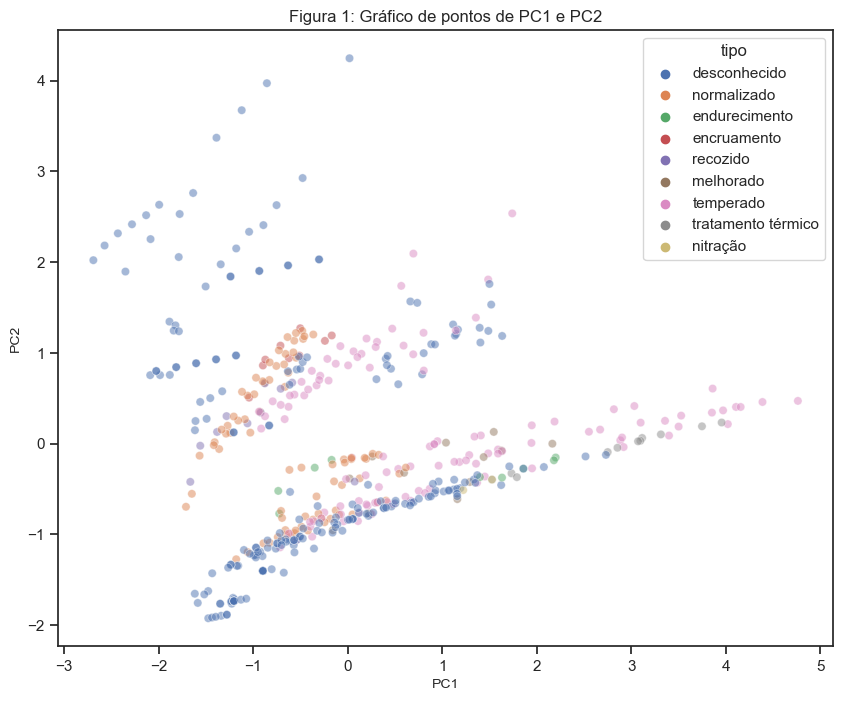

In [37]:
sns.set_theme(style= 'ticks')

f, ax = plt.subplots( figsize = (10,8))

sns.scatterplot(data = df_pca_metal, x = 'PC1', y = 'PC2', hue = 'tipo', alpha = 0.5)

ax.set_xlabel('PC1', fontsize = 10)
ax.set_ylabel('PC2', fontsize = 10)
ax.set_title('Figura 1: Gráfico de pontos de PC1 e PC2', fontsize = 12)

plt.show()

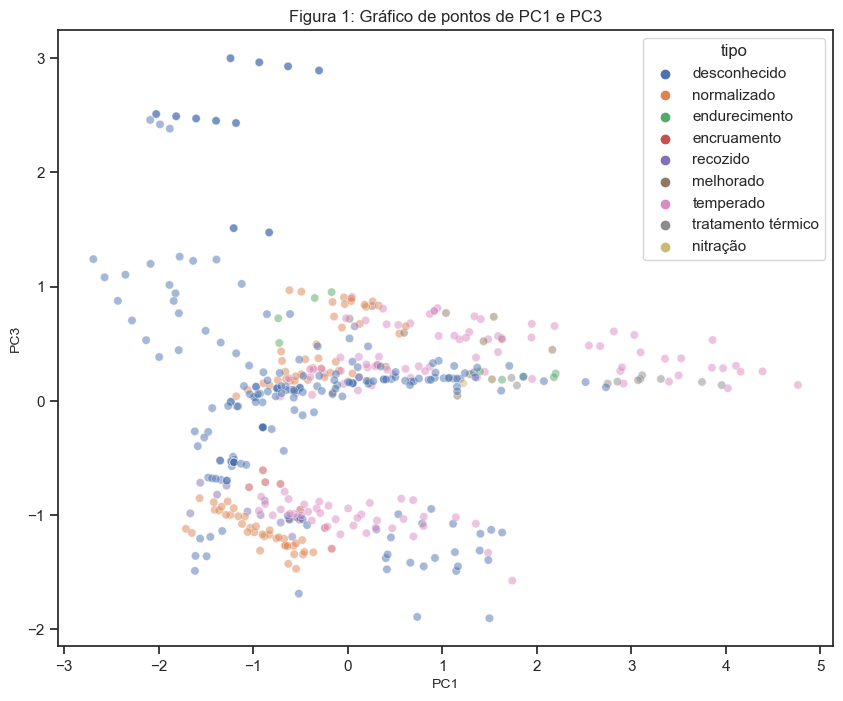

In [38]:
sns.set_theme(style= 'ticks')

f, ax = plt.subplots( figsize = (10,8))

sns.scatterplot(data = df_pca_metal, x = 'PC1', y = 'PC3', hue = 'tipo', alpha = 0.5)

ax.set_xlabel('PC1', fontsize = 10)
ax.set_ylabel('PC3', fontsize = 10)
ax.set_title('Figura 1: Gráfico de pontos de PC1 e PC3', fontsize = 12)

plt.show()

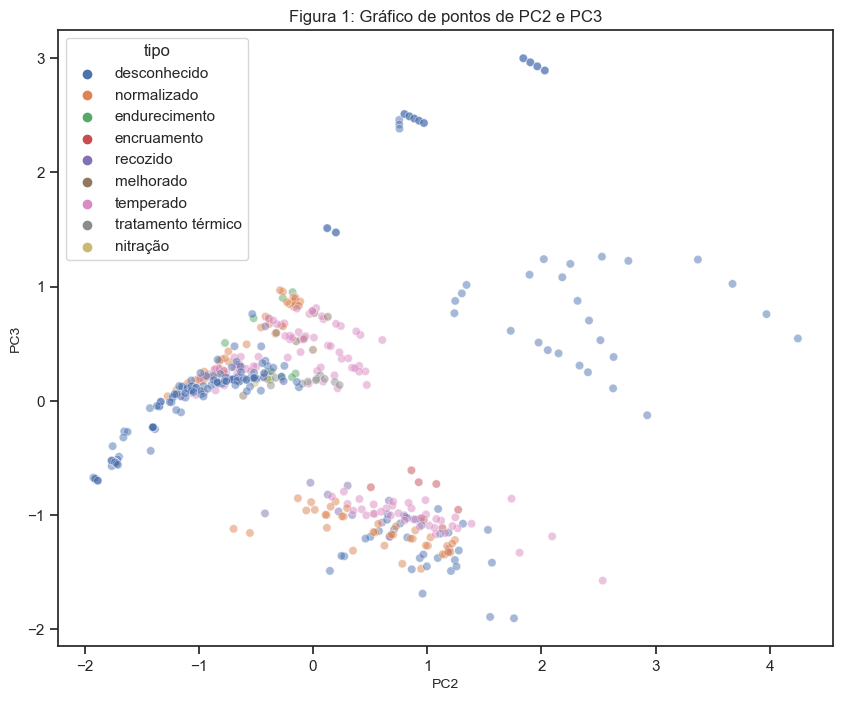

In [39]:
sns.set_theme(style= 'ticks')

f, ax = plt.subplots( figsize = (10,8))

sns.scatterplot(data = df_pca_metal, x = 'PC2', y = 'PC3', hue = 'tipo', alpha = 0.5)

ax.set_xlabel('PC2', fontsize = 10)
ax.set_ylabel('PC3', fontsize = 10)
ax.set_title('Figura 1: Gráfico de pontos de PC2 e PC3', fontsize = 12)

plt.show()

In [41]:
# biplot 
loadings = pca_otimo.components_ #coeficiente de correlação
n_features = pca_otimo.n_features_in_ #numero de features antes de PCA
features_names = df_teste.columns #nome das caolunas

#nomes do PC 
pc_list = [f'PC{i}' for i in list(range(1, n_features - 1))]

#associando os noems dos PC com os loagins
pc_loadings = dict(zip(pc_list, loadings))

loadigns_df = pd.DataFrame.from_dict(pc_loadings)
loadigns_df['features_names'] = features_names
loadigns_df = loadigns_df.set_index('features_names')

/Users/mmoliveira/anaconda3/envs/tcc_dsa23/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/private/tmp/PKInstallSandbox.QZdpJd/tmp/ipykernel_31367/3654689438.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(xs[i], ys[i], s= 200, alpha =0.8, cmap='viridis')


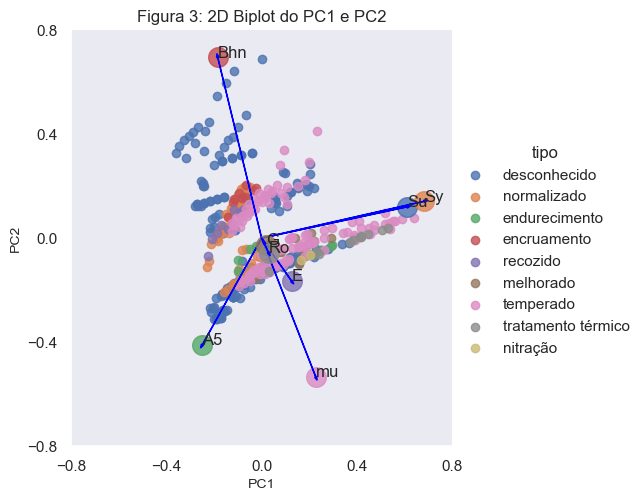

In [42]:
pca_df = df_pca_metal.drop(['classe'], axis =1)
pca_df_scaled= pca_df.copy()

scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1/ (scaler_df.max() - scaler_df.min())

for index in scaler.index:
    pca_df_scaled[index]*=scaler[index]
    
#get de loadings
sns.set_theme(style = 'dark')
xs = loadings[0]
ys = loadings[1]

sns.lmplot(data = pca_df_scaled, x = 'PC1', y = 'PC2', hue = 'tipo', fit_reg=False)

for i, varnames in enumerate(features_names):
    plt.scatter(xs[i], ys[i], s= 200, alpha =0.8, cmap='viridis')
    plt.arrow(0, 0, 
              xs[i],
              ys[i],
              color='blue',
              head_width = 0.01
              )
    plt.text(xs[i], ys[i], varnames)

ticks = np.linspace(-0.8, 0.8, num =5)
plt.xticks(ticks)
plt.yticks(ticks)

plt.xlabel('PC1', fontsize = 10)
plt.ylabel('PC2',  fontsize = 10)
plt.title('Figura 3: 2D Biplot do PC1 e PC2', fontsize = 12)

plt.show()

/Users/mmoliveira/anaconda3/envs/tcc_dsa23/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


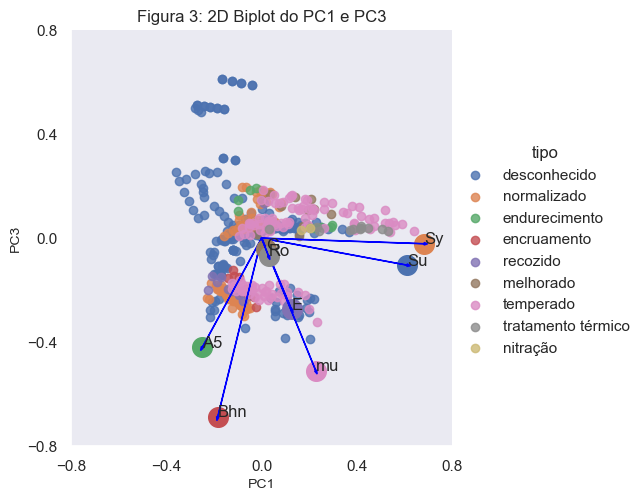

In [43]:
pca_df_scaled2= pca_df.copy()
scaler_df2 = pca_df[['PC1', 'PC3']]
scaler2 = 1/ (scaler_df2.max() - scaler_df2.min())

for index in scaler2.index:
    pca_df_scaled2[index]*=scaler2[index]
    
#get de loadings
sns.set_theme(style = 'dark')
xs = loadings[0]
ys = loadings[2]

sns.lmplot(data = pca_df_scaled2, x = 'PC1', y = 'PC3', hue = 'tipo', fit_reg=False)

for i, varnames in enumerate(features_names):
    plt.scatter(xs[i], ys[i], s= 200)
    plt.arrow(0, 0, 
              xs[i],
              ys[i],
              color='blue',
              head_width = 0.01
              )
    plt.text(xs[i], ys[i], varnames)

ticks = np.linspace(-0.8, 0.8, num =5)
plt.xticks(ticks)
plt.yticks(ticks)

plt.xlabel('PC1', fontsize = 10)
plt.ylabel('PC3',  fontsize = 10)
plt.title('Figura 3: 2D Biplot do PC1 e PC3', fontsize = 12)

plt.show()

/Users/mmoliveira/anaconda3/envs/tcc_dsa23/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


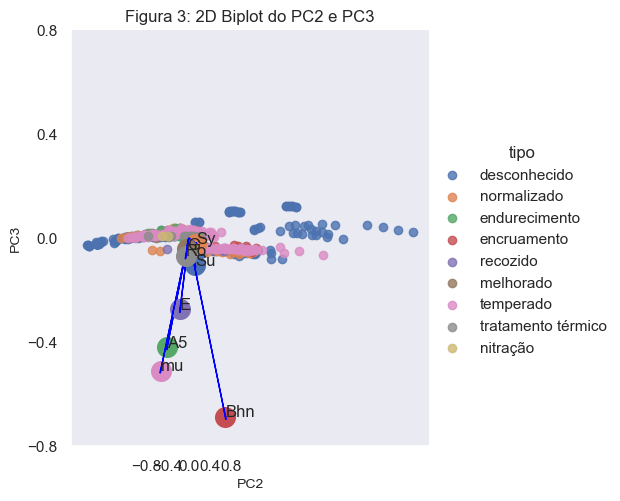

In [44]:
pca_df_scaled3= pca_df.copy()
scaler_df3 = pca_df[['PC1', 'PC3']]
scaler3 = 1/ (scaler_df3.max() - scaler_df3.min())

for index in scaler3.index:
    pca_df_scaled2[index]*=scaler3[index]
    
#get de loadings
sns.set_theme(style = 'dark')
xs = loadings[1]
ys = loadings[2]

sns.lmplot(data = pca_df_scaled2, x = 'PC2', y = 'PC3', hue = 'tipo', fit_reg=False)

for i, varnames in enumerate(features_names):
    plt.scatter(xs[i], ys[i], s= 200)
    plt.arrow(0, 0, 
              xs[i],
              ys[i],
              color='blue',
              head_width = 0.01
              )
    plt.text(xs[i], ys[i], varnames)

ticks = np.linspace(-0.8, 0.8, num =5)
plt.xticks(ticks)
plt.yticks(ticks)

plt.xlabel('PC2', fontsize = 10)
plt.ylabel('PC3',  fontsize = 10)
plt.title('Figura 3: 2D Biplot do PC2 e PC3', fontsize = 12)

plt.show()

Determinando o número de clusters

In [52]:
wcs = {}

for i in range (1, 7):
    kmeans = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
    kmeans.fit(df_treino)
    wcs[i] = kmeans.inertia_

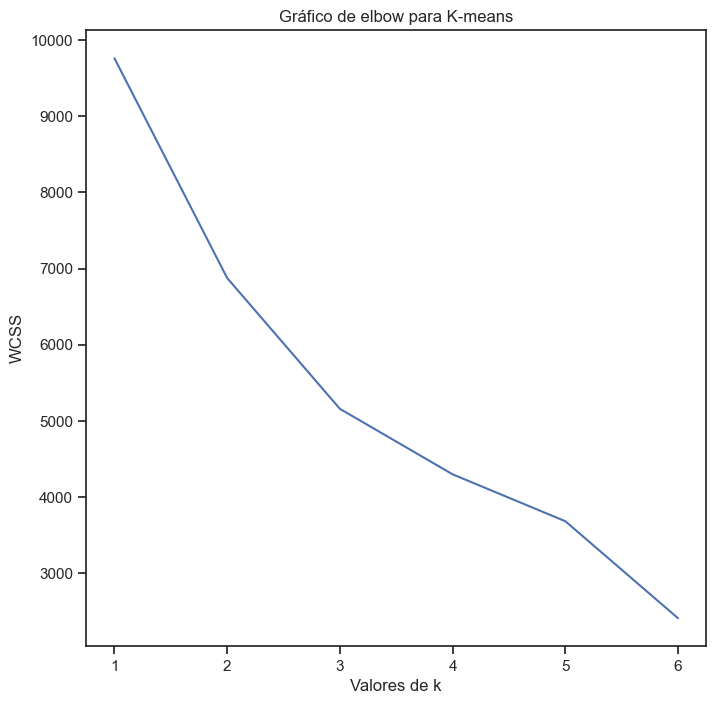

In [54]:
#Gráfico de elbow
sns.set_theme(style ='ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.lineplot(x = wcs.keys(), y = wcs.values())

ax.set(xlabel='Valores de k')
ax.set(ylabel= 'WCSS')
ax.set(title = 'Gráfico de elbow para K-means')

plt.show()

In [129]:
kmeans_pca = KMeans(n_clusters = 3, n_init='auto', random_state=0)
clusters = kmeans_pca.fit_predict(df_pca)

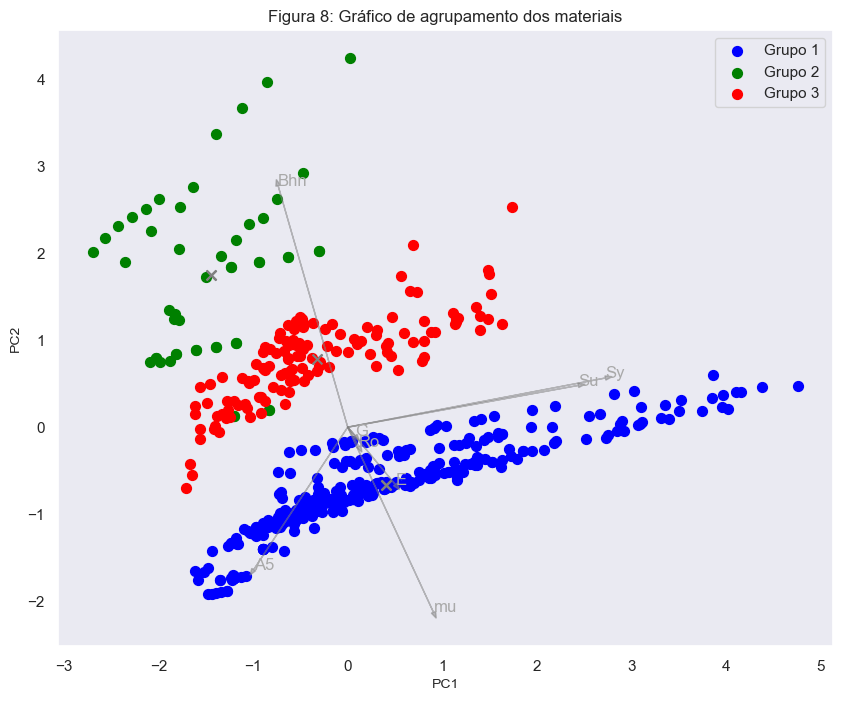

In [154]:
from scipy.spatial import ConvexHull

sns.set_theme(style='dark')

f, ax = plt.subplots(figsize = (10,8))

colors = ['blue', 'green', 'red']
xs = loadings[0]
ys = loadings[1]

for i in range(3):
    ds = df_pca[np.where(clusters == i)]
    plt.scatter(x= ds[:, 0], y = ds[:, 1], s=50, label = 'Grupo ' + str(i+1), color = colors[i])
    plt.scatter(x= kmeans_pca.cluster_centers_[:,0], y = kmeans_pca.cluster_centers_[:,1], color = 'gray', s = 50, marker='x')

for j, varnames in enumerate(features_names):
    plt.arrow(0, 0, xs[j]*4, ys[j]*4, color='gray', head_width = 0.05, alpha = 0.5)
    plt.text(xs[j]*4, ys[j]*4, varnames, color = 'darkgray')


ax.set_xlabel('PC1', fontsize = 10)
ax.set_ylabel('PC2', fontsize = 10)
ax.set_title('Figura 8: Gráfico de agrupamento dos materiais', fontsize=12)
plt.legend()

plt.show()

Random florest classificador

In [256]:
df.head()

,Su,Sy,E,G,mu,Ro,classe_nome
0,421,314,207000,79000,0.3,7860,7
1,424,324,207000,79000,0.3,7860,3
2,386,284,207000,79000,0.3,7860,4
3,448,331,207000,79000,0.3,7860,7
4,441,346,207000,79000,0.3,7860,3


In [310]:
df_rf = df.copy()

In [300]:
df_rf.drop(['mu'], axis = 1, inplace = True)

In [311]:
RF_X = df_rf.iloc[:, 0:3]
RF_Y = df_rf['classe_nome']

In [312]:
rfx_treino, rfx_teste, rfy_treino, rfy_teste = train_test_split(RF_X, RF_Y, random_state = 10, shuffle = False, train_size = .80)

In [313]:
#criando o random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(rfx_treino, rfy_treino)

RandomForestClassifier(random_state=0)

In [204]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [314]:
y_pred = rf.predict(rfx_teste)

In [315]:
acuracia = accuracy_score(rfy_teste, y_pred)
print('Acurácia:', acuracia)

Acurácia: 0.5659163987138264


In [316]:
feature_scores = pd.Series(rf.feature_importances_, index=rfx_treino.columns).sort_values(ascending=False)

In [317]:
print(feature_scores)

E     0.387111
Sy    0.308153
Su    0.304736
dtype: float64


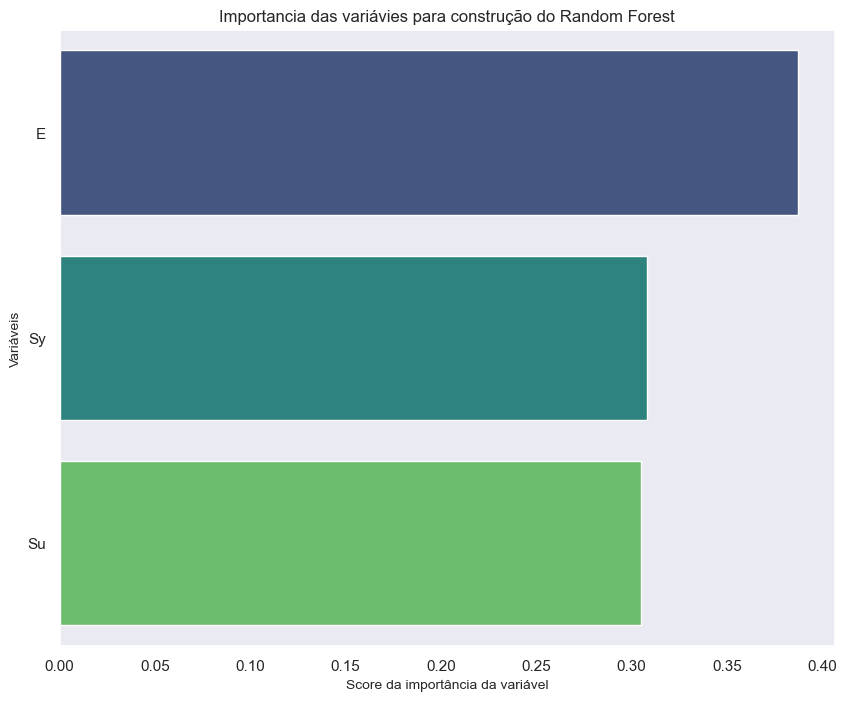

In [321]:
sns.set_theme(style = 'dark')

f, ax = plt.subplots(figsize = (10,8))

sns.barplot(x=feature_scores, y=feature_scores.index, palette ='viridis')

ax.set_xlabel('Score da importância da variável', fontsize = 10)
ax.set_ylabel('Variáveis', fontsize = 10)
ax.set_title("Importancia das variávies para construção do Random Forest", fontsize = 12)

plt.show()

In [322]:
matriz_confusao = confusion_matrix(rfy_teste, y_pred)

display(matriz_confusao)

array([[141,   0,  18,   0,   7,   0,   5,   1,   1],
       [ 40,  12,   5,   2,   5,   1,   2,   0,   0],
       [ 30,   1,  13,   7,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,  10,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   2,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0]])

In [323]:
from sklearn.metrics import classification_report

In [325]:
print(classification_report(rfy_teste, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.82      0.72       173
           2       0.92      0.18      0.30        67
           3       0.36      0.25      0.30        52
           4       0.00      0.00      0.00         0
           5       0.42      0.83      0.56        12
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         2

    accuracy                           0.57       311
   macro avg       0.26      0.23      0.21       311
weighted avg       0.64      0.57      0.54       311



/Users/mmoliveira/anaconda3/envs/tcc_dsa23/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mmoliveira/anaconda3/envs/tcc_dsa23/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mmoliveira/anaconda3/envs/tcc_dsa23/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r